In [2]:
import pandas as pd

In [49]:
import matplotlib.pyplot as plt

In [4]:
df1 = pd.read_csv("../data/uoft-first-year-data-2020-07-23.csv")

In [5]:
df1

,code,org,section,enrollmentCapacity,actualEnrolment,deliveryMode
0,ANT100Y1,ANT,Y,1030,30,ONLSYNC
1,ANT193H1,ANT,S,12,0,CLASS
2,ANT193H1,ANT,S,13,0,ONLSYNC
3,ANT194H1,ANT,F,25,0,ONLSYNC
4,ANT199H1,ANT,F,10,0,CLASS
...,...,...,...,...,...,...
578,WDW152H1,WDW,S,19,0,ONLSYNC
579,WDW196H1,WDW,F,12,0,CLASS
580,WDW196H1,WDW,F,13,0,ONLSYNC
581,WDW199H1,WDW,F,12,0,CLASS


In [13]:
fall_year_sections = df1[df1.section.isin(["F", "Y"])]

In [65]:
fall_year_sections

,code,org,section,enrollmentCapacity,actualEnrolment,deliveryMode
0,ANT100Y1,ANT,Y,1030,30,ONLSYNC
3,ANT194H1,ANT,F,25,0,ONLSYNC
4,ANT199H1,ANT,F,10,0,CLASS
5,ANT199H1,ANT,F,15,0,ONLSYNC
6,ANT253H1,ANT,F,500,330,ONLASYNC
...,...,...,...,...,...,...
572,WDW151H1,WDW,F,1,0,ONLSYNC
579,WDW196H1,WDW,F,12,0,CLASS
580,WDW196H1,WDW,F,13,0,ONLSYNC
581,WDW199H1,WDW,F,12,0,CLASS


In [66]:
sections_with_enrolment = fall_year_sections.groupby(['code', 'section']).filter(lambda section: section['actualEnrolment'].sum() > 0)

In [70]:
sections_with_enrolment['enrollmentPercentage'] = sections_with_enrolment.apply(lambda row: row['actualEnrolment'] / row['enrollmentCapacity'], axis=1)

In [71]:
sections_with_enrolment

,code,org,section,enrollmentCapacity,actualEnrolment,deliveryMode,enrollmentPercentage
0,ANT100Y1,ANT,Y,1030,30,ONLSYNC,0.029126
6,ANT253H1,ANT,F,500,330,ONLASYNC,0.660000
7,FAH102H1,FAR,F,201,8,ONLASYNC,0.039801
14,AST101H1,AST,F,1650,903,ONLASYNC,0.547273
29,CHM135H1,CHM,F,300,12,ONLSYNC,0.040000
...,...,...,...,...,...,...,...
462,SPA100Y1,SPA,Y,75,0,ONLSYNC,0.000000
463,SPA100Y1,SPA,Y,75,0,ONLSYNC,0.000000
475,STA130H1,STAT,F,288,60,ONLSYNC,0.208333
476,STA130H1,STAT,F,288,12,ONLSYNC,0.041667


In [67]:
sections_with_multiple_delivery_modes = sections_with_enrolment.groupby(['code', 'section']).filter(lambda section: len(section['deliveryMode'].unique()) > 1)

In [72]:
sections_with_multiple_delivery_modes

,code,org,section,enrollmentCapacity,actualEnrolment,deliveryMode,enrollmentPercentage
92,EAS110Y1,EAS,Y,50,15,ONLASYNC,0.300000
93,EAS110Y1,EAS,Y,50,15,ONLASYNC,0.300000
94,EAS110Y1,EAS,Y,30,10,ONLSYNC,0.333333
95,EAS110Y1,EAS,Y,30,10,ONLSYNC,0.333333
148,FSL121Y1,FRE,Y,60,4,ONLSYNC,0.066667
149,FSL121Y1,FRE,Y,32,4,CLASS,0.125000
150,FSL121Y1,FRE,Y,28,10,ONLSYNC,0.357143
157,FRE245H1,FRE,F,20,10,CLASS,0.500000
158,FRE245H1,FRE,F,70,13,ONLSYNC,0.185714
220,MAT133Y1,MAT,Y,24,21,CLASS,0.875000


code      section
EAS110Y1  Y          AxesSubplot(0.125,0.125;0.775x0.755)
FRE245H1  F          AxesSubplot(0.125,0.125;0.775x0.755)
FSL121Y1  Y          AxesSubplot(0.125,0.125;0.775x0.755)
MAT133Y1  Y          AxesSubplot(0.125,0.125;0.775x0.755)
MAT137Y1  Y          AxesSubplot(0.125,0.125;0.775x0.755)
RSM219H1  F          AxesSubplot(0.125,0.125;0.775x0.755)
SAS114H1  F          AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

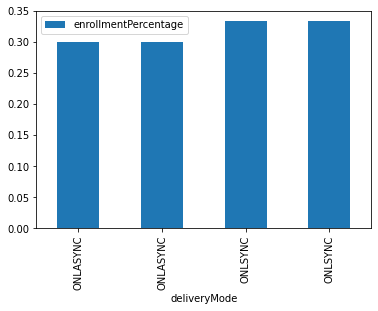

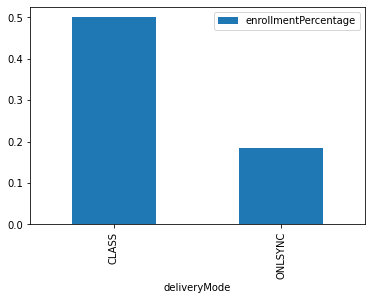

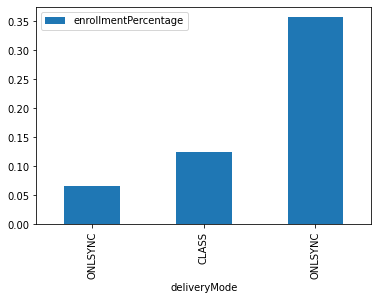

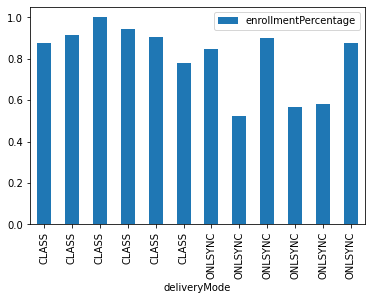

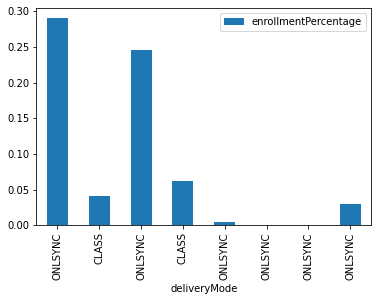

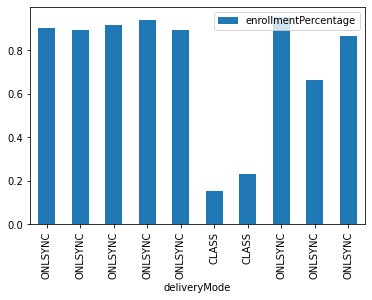

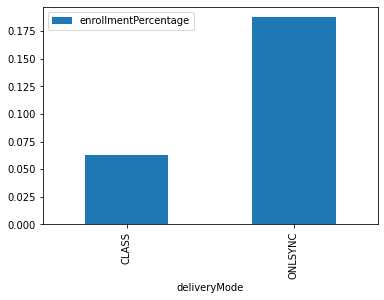

In [73]:
sections_with_multiple_delivery_modes.groupby(['code', 'section']).plot(kind='bar', x='deliveryMode', y='enrollmentPercentage')

In [43]:
overall_enrollments = sections_with_multiple_delivery_modes.groupby(['deliveryMode']).agg({'enrollmentCapacity': 'sum', 'actualEnrolment': 'sum'})

In [46]:
overall_enrollments['enrollmentPercentage'] = overall_enrollments.apply(lambda row: row['actualEnrolment'] / row['enrollmentCapacity'], axis=1)

In [47]:
overall_enrollments

,enrollmentCapacity,actualEnrolment,enrollmentPercentage
deliveryMode,,,
CLASS,1120,212,0.189286
ONLASYNC,100,30,0.300000
ONLSYNC,4165,1630,0.391357


In [77]:
all_first_year_enrollments = sections_with_enrolment.groupby(['deliveryMode']).agg({'enrollmentCapacity': 'sum', 'actualEnrolment': 'sum'})

In [78]:
all_first_year_enrollments

,enrollmentCapacity,actualEnrolment
deliveryMode,,
CLASS,398,212
ONLASYNC,10465,3088
ONLSYNC,18327,4774
